In [1]:
import numpy as np
import pandas as pd
# im
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
def plot_data(X,y,title='Closed form solution',pltobj=None):
    xlabel='X'
    ylabel='y'
    if pltobj is None:
        pltobj=plt
        pltobj.scatter(X,y)
        pltobj.xlabel('X')
        pltobj.ylabel('y')
        pltobj.title(title)
        
    else:
        pltobj.scatter(X,y)

        pltobj.set_xlabel('X')
        pltobj.set_ylabel('y')
        pltobj.set_title(title)

def random_data(n,a=3,b=4,plotting=False):
    '''generate random data of given shape with some gaussian noise'''

    X=np.random.rand(n,1) #returns random value in a given shape, in this case nx1 (uniform probability distribution)
    y=b + a*X+ np.random.randn(n,1) #the randn function is similar. except it generates gaussian noise
    if plotting==True:
        plot_data(X,y,title='Data')
        plt.show()

    ind=np.argsort(X,axis=0)
    X=np.take_along_axis(X,ind,axis=0)
    y=np.take_along_axis(y,ind,axis=0)


    return X,y



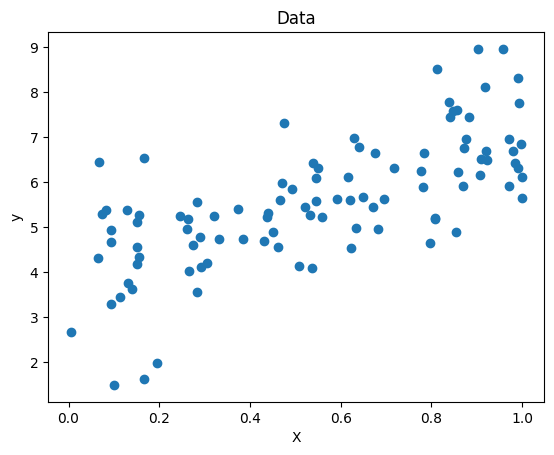

In [293]:
X,y=random_data(100,plotting=True)
X_=np.concatenate((np.ones((n,1)),X),axis=1)

We use this following equation for closed form solution : 
$$ \hat \theta = (X^TX)^{-1}\cdot X^T \cdot y$$

[[3.75491115]
 [3.30025359]]


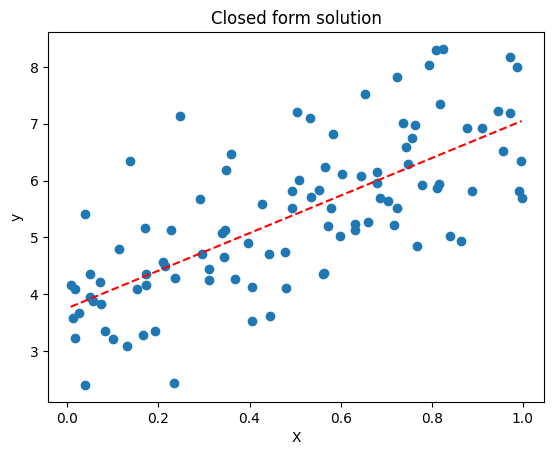

In [200]:
def get_weights_closed_form(X,y):  
    '''returns closed form solution for weights'''
    # X=np.concatenate((np.ones((n,1)),X_),axis=1)  #add ones to the data to accomodate bias term
    #dataset is now nx2 [or nx(m+1)]
    XT=np.transpose(X)
    weights=np.matmul(np.linalg.inv(np.matmul(XT,X)),np.matmul(XT,y))
    return weights
n=X.shape[0]

w=get_weights_closed_form(X_,y)
print(w)
pred=np.dot(X_,w)

plot_data(X,y)
plt.plot(X,pred,color='red',linestyle='--')
plt.show()

In [289]:
def mse(x1,x2):
    n=x1.shape[0]
    return (0.5/n)*np.sum(np.square((x1-x2)))

def grad(X,y,w):
    '''1D batch gradient descent''' 
    n=X.shape[0]
    #note: @ means matrix mulitplication (np.matmul)
    return (2/n)*(X.T)@(X@w-y) #gradient vector   
    
grad(X_,y,w).shape
# X.shape



(2, 1)

array([[3.75491115],
       [3.30025359]])

In [294]:
def get_weights_grad_descent(X,y,*,learning_rate,epochs,wlist=None):
    # the * force parameteres after that as keyword only arguments
    n,m=X.shape
    w=np.random.randn(m,1)
    # XT=X.T
    X1=X[:,1]

    for i in range(epochs):
        w-=learning_rate*grad(X,y,w)
        if (wlist is not None):
            wlist.append((w[0][0],w[1][0]))
    return w
w_low=get_weights_grad_descent(X_,y,learning_rate=0.01,epochs=100)
w_mid=get_weights_grad_descent(X_,y,learning_rate=0.2,epochs=100)
w_high=get_weights_grad_descent(X_,y,learning_rate=0.8,epochs=100)

wlist_=[]
get_weights_grad_descent(X_,y,learning_rate=0.2,epochs=100,wlist=wlist_)
# wlist_

array([[3.83070247],
       [3.20969389]])

-0.7409599240573639

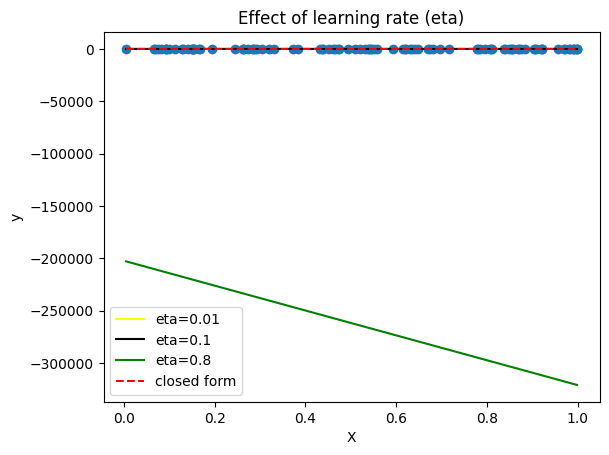

In [295]:
plot_data(X,y,title='Effect of learning rate (eta)')
plt.plot(X,X_@w_low,color='yellow',label='eta=0.01')
plt.plot(X,X_@w_mid,color='black',label='eta=0.1')
plt.plot(X,X_@w_high,color='green',label='eta=0.8')
plt.plot(X,X_@w,color='red',label='closed form',linestyle='--')
plt.legend()
plt.show()


Learning rate expression used in stochastic and Mini Batch Gradient Descent:
$$ eta(t) = \frac{t_0}{t+t_1}$$

[[-0.90835065]
 [-0.98433251]]
[[-2.13673798]
 [ 0.09424081]]
[[-0.59664469]
 [-1.23681615]]
[[0.64086396]
 [0.91464965]]
[[-0.71586646]
 [ 1.83707741]]
[[-0.51172902]
 [-0.29129409]]
[[-0.2344263 ]
 [ 0.65832992]]


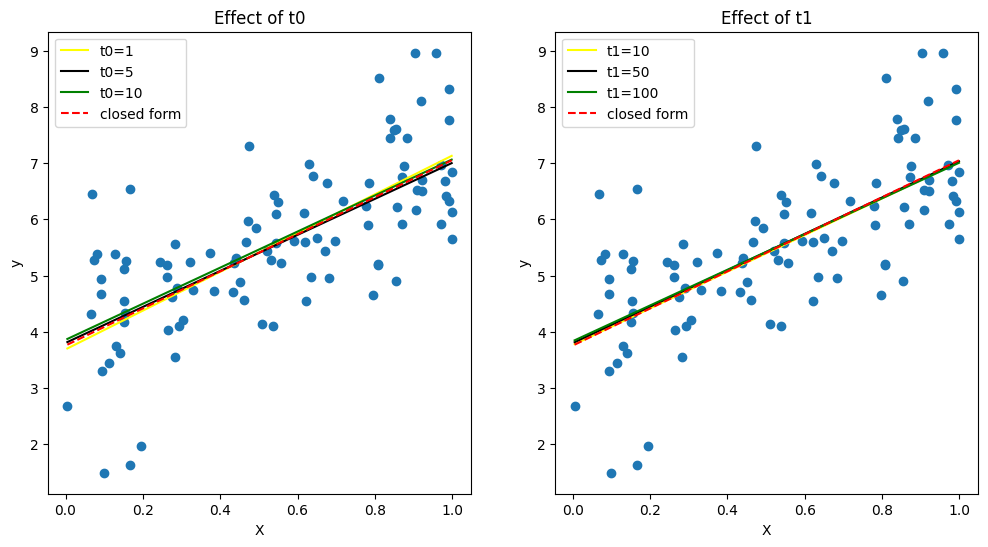

In [298]:
def get_eta_stochastic(t,t0=5,t1=50):
    return t0/(t+t1)

def get_weights_stochastic_grad_descent(X,y,*,epochs,t0=5,t1=50,wlist=None):
    # the * force parameteres after that as keyword only arguments
    n,m=X.shape
    w=np.random.randn(m,1)
    # while epochs>1:
    print(w)
    for epoch in range(epochs):
        for i in range(n):
            r=np.random.randint(n)
            learning_rate=get_eta_stochastic(n*epoch+i,t0,t1)
            w-=learning_rate*grad(X[r:r+1],y[r:r+1],w)
        if (wlist is not None):
            wlist.append((w[0][0],w[1][0]))
            pass
    return w

wlist_stochastic=[]
get_weights_stochastic_grad_descent(X_,y,epochs=100,t0=10,wlist=wlist_stochastic)
# print("\n",w5, " are weights, and id of wlist is ",id(wlist_stochastic))
# wlist_stochastic
fig,axs=plt.subplots(1,2,figsize=(12,6))

w_low=get_weights_stochastic_grad_descent(X_,y,epochs=100,t0=1)
w_mid=get_weights_stochastic_grad_descent(X_,y,epochs=100,t0=5)
w_high=get_weights_stochastic_grad_descent(X_,y,epochs=100,t0=10)

plot_data(X,y,title='Effect of t0',pltobj=axs[0])
# plot_data(X,y,title='Effect of t0',fig=fig,pltobj=axs[1])
axs[0].plot(X,X_@w_low,color='yellow',label='t0=1')
axs[0].plot(X,X_@w_mid,color='black',label='t0=5')
axs[0].plot(X,X_@w_high,color='green',label='t0=10')
axs[0].plot(X,X_@w,color='red',label='closed form',linestyle='--')
axs[0].legend()
# axs[1].show()

w_low=get_weights_stochastic_grad_descent(X_,y,epochs=100,t1=10)
w_mid=get_weights_stochastic_grad_descent(X_,y,epochs=100,t1=50)
w_high=get_weights_stochastic_grad_descent(X_,y,epochs=100,t1=100)

plot_data(X,y,title='Effect of t1',pltobj=axs[1])
# plot_data(X,y,title='Effect of t1',fig=fig,pltobj=axs[0])
axs[1].plot(X,X_@w_low,color='yellow',label='t1=10')
axs[1].plot(X,X_@w_mid,color='black',label='t1=50')
axs[1].plot(X,X_@w_high,color='green',label='t1=100')
axs[1].plot(X,X_@w,color='red',label='closed form',linestyle='--')
axs[1].legend()

# plt.title("Stochastic gradient descent")
plt.show()




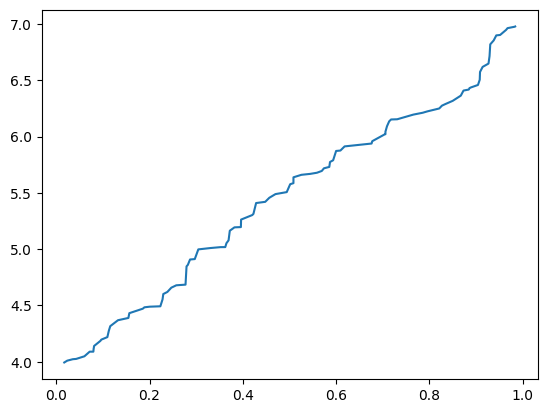

In [150]:
b=[]
a=4
for i in range(5):
    print(a,end=" ")
    b.append(a)
    a+=np.random.randint(4)
print()
print(b)
    


4 5 5 7 8 
[4, 5, 5, 7, 8]


In [118]:
# get_eta_stochastic(110,t0=5,t1=50)

0.03125

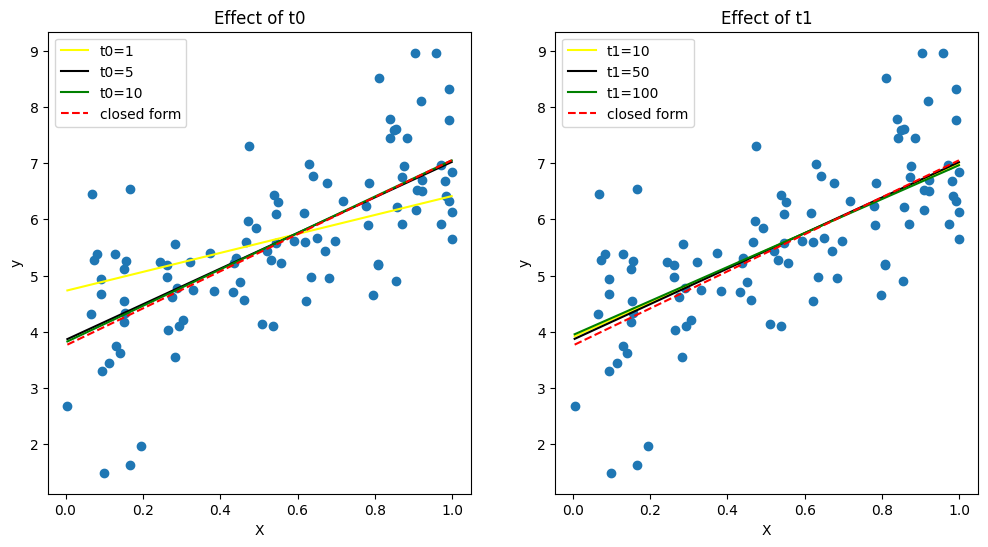

In [299]:
def get_weights_inorder_grad_descent(X,y,*,epochs,t0=5,t1=50,wlist=None):
    # the * force parameteres after that as keyword only arguments
    n,m=X.shape
    w=np.random.randn(m,1)
    # while epochs>1:
    for epoch in range(epochs):
        for i in range(n):
            # r=np.random.randint(n)
            r=i
            learning_rate=get_eta_stochastic(n*epoch+i,t0,t1)
            w-=learning_rate*grad(X[r:r+1],y[r:r+1],w)
        if (wlist is not None):
            wlist.append((w[0][0],w[1][0]))
            pass
    return w

fig,axs=plt.subplots(1,2,figsize=(12,6))

w_low=get_weights_inorder_grad_descent(X_,y,epochs=100,t0=1)
w_mid=get_weights_inorder_grad_descent(X_,y,epochs=100,t0=5)
w_high=get_weights_inorder_grad_descent(X_,y,epochs=100,t0=10)

plot_data(X,y,title='Effect of t0',pltobj=axs[0])
# plot_data(X,y,title='Effect of t0',fig=fig,pltobj=axs[1])
axs[0].plot(X,X_@w_low,color='yellow',label='t0=1')
axs[0].plot(X,X_@w_mid,color='black',label='t0=5')
axs[0].plot(X,X_@w_high,color='green',label='t0=10')
axs[0].plot(X,X_@w,color='red',label='closed form',linestyle='--')
axs[0].legend()
# axs[1].show()

w_low=get_weights_inorder_grad_descent(X_,y,epochs=100,t1=10)
w_mid=get_weights_inorder_grad_descent(X_,y,epochs=100,t1=50)
w_high=get_weights_inorder_grad_descent(X_,y,epochs=100,t1=100)

plot_data(X,y,title='Effect of t1',pltobj=axs[1])
# plot_data(X,y,title='Effect of t1',fig=fig,pltobj=axs[0])
axs[1].plot(X,X_@w_low,color='yellow',label='t1=10')
axs[1].plot(X,X_@w_mid,color='black',label='t1=50')
axs[1].plot(X,X_@w_high,color='green',label='t1=100')
axs[1].plot(X,X_@w,color='red',label='closed form',linestyle='--')
axs[1].legend()

# plt.title("Stochastic gradient descent")
plt.show()

# wlist_inorder=[]
# get_weights_inorder_grad_descent(X_,y,epochs=100,wlist=wlist_inorder)



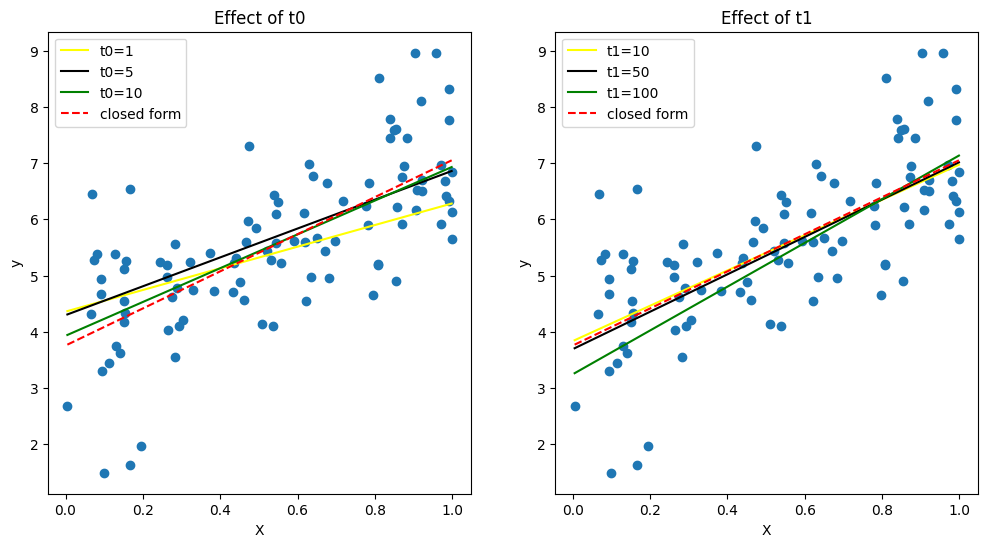

array([[3.16770904],
       [3.98369628]])

In [296]:
def get_weights_batch_grad_descent(X,y,*,epochs,t0=5,t1=50, batchsize=60,wlist=None):
    # the * force parameteres after that as keyword only arguments
    n,m=X.shape
    w=np.random.randn(m,1)
    # while epochs>1:
    n1=int(n/10)
    for epoch in range(epochs):
        for i in range(n1):
            r=np.random.randint(n)
            
            learning_rate=get_eta_stochastic(n*epoch+i,t0,t1)
            delta_w=grad(X[r:r+batchsize],y[r:r+batchsize],w)
            # print(w.shape,delta_w.shape)
            w-=learning_rate*delta_w
        
        if (wlist is not None):
            wlist.append((w[0][0],w[1][0]))
            # print("added", len(wlist))
            pass
    return w

fig,axs=plt.subplots(1,2,figsize=(12,6))

w_low=get_weights_batch_grad_descent(X_,y,epochs=100,t0=1)
w_mid=get_weights_batch_grad_descent(X_,y,epochs=100,t0=5)
w_high=get_weights_batch_grad_descent(X_,y,epochs=100,t0=10)

plot_data(X,y,title='Effect of t0',pltobj=axs[0])
# plot_data(X,y,title='Effect of t0',fig=fig,pltobj=axs[1])
axs[0].plot(X,X_@w_low,color='yellow',label='t0=1')
axs[0].plot(X,X_@w_mid,color='black',label='t0=5')
axs[0].plot(X,X_@w_high,color='green',label='t0=10')
axs[0].plot(X,X_@w,color='red',label='closed form',linestyle='--')
axs[0].legend()
# axs[1].show()

w_low=get_weights_batch_grad_descent(X_,y,epochs=100,t1=10)
w_mid=get_weights_batch_grad_descent(X_,y,epochs=100,t1=50)
w_high=get_weights_batch_grad_descent(X_,y,epochs=100,t1=100)

plot_data(X,y,title='Effect of t1',pltobj=axs[1])
# plot_data(X,y,title='Effect of t1',fig=fig,pltobj=axs[0])
axs[1].plot(X,X_@w_low,color='yellow',label='t1=10')
axs[1].plot(X,X_@w_mid,color='black',label='t1=50')
axs[1].plot(X,X_@w_high,color='green',label='t1=100')
axs[1].plot(X,X_@w,color='red',label='closed form',linestyle='--')
axs[1].legend()

# plt.title("Stochastic gradient descent")
plt.show()

wlist_batch=[]

get_weights_batch_grad_descent(X_,y,epochs=100,wlist=wlist_batch)

In [265]:
# len(wlist_stochastic)

100

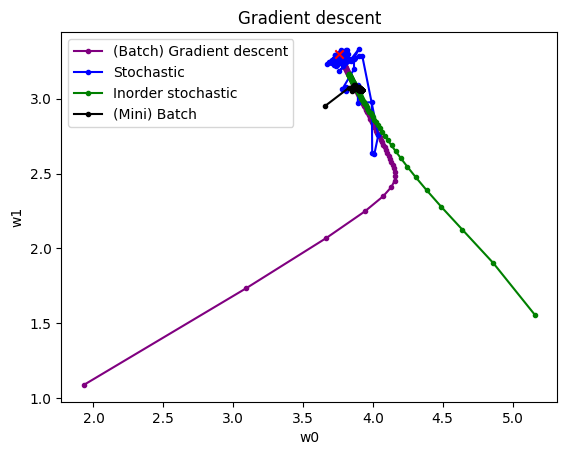

In [272]:
wlists = [
    ("(Batch) Gradient descent",wlist_),
    ("Stochastic",wlist_stochastic),
    ("Inorder stochastic",wlist_inorder),
    ("(Mini) Batch",wlist_batch),

]


plt.xlabel("w0")
plt.ylabel("w1")
plt.title("Gradient descent")
colors=['purple','blue','green','black']

count=0
for (kind,wlist1) in wlists:
    plt.plot()
    # Extracting x and y values from the 2D list
    x_ = [row[0] for row in wlist1]  # First column
    y_ = [row[1] for row in wlist1]  # Second column

    # Plotting
    plt.plot(x_, y_, marker='o',label=kind,color=colors[count],ms=3)
    count+=1
plt.scatter(w[0],w[1],marker='x',color='red',zorder=5)
plt.legend()


We can note the following : 
1. Gradient descent converges to minima but tough to compute.
3. Stochastic grad descent converges near the minima , but bounces around a bit. However it needs less computation and gives good enough minima
3. Inorder stochastic method goes steadily towards minima but does not converge, at least in this example.
2. Mini Batch gradient descent does not converge properly and requires more computation , but not as much as gradient descent
